In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read and explore dataset
churn = pd.read_csv('churn.csv')
churn.head(2)

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   has_churned                400 non-null    int64  
 1   time_since_first_purchase  400 non-null    float64
 2   time_since_last_purchase   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
churn.describe()

,has_churned,time_since_first_purchase,time_since_last_purchase
count,400.000000,400.000000,400.000000
mean,0.500000,-0.034370,0.144549
std,0.500626,0.952936,1.103133
min,0.000000,-1.273770,-0.870666
25%,0.000000,-0.828377,-0.645824
50%,0.500000,-0.152072,-0.265036
75%,1.000000,0.544826,0.571214
max,1.000000,3.738312,5.928242


EDA exploratory data analysis

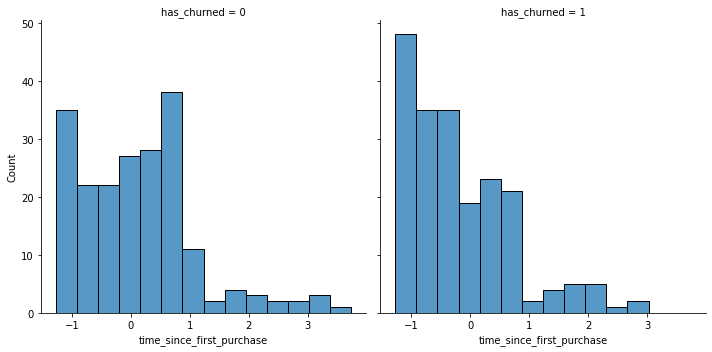

In [5]:
# plot distribution of 'time_since_first_purchase' grouped by 'has_churned'
sns.displot(x = 'time_since_first_purchase', data = churn, col = 'has_churned')
plt.show()

More customers churned had shorter length of relationship

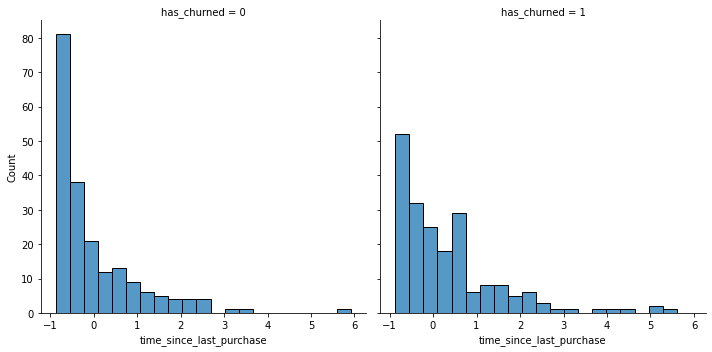

In [6]:
# plot distribution of 'time_since_last_purchase' grouped by 'has_churned'
sns.displot(x = 'time_since_last_purchase', data = churn, col = 'has_churned')
plt.show()

Customers who did not have recent activities tend to churn.

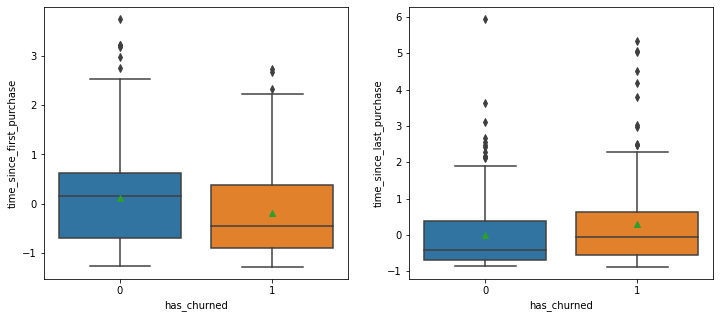

In [7]:
# distribution of customers churned
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.boxplot(x = 'has_churned', y = 'time_since_first_purchase', showmeans = True, data = churn, ax = ax[0])
sns.boxplot(x = 'has_churned', y = 'time_since_last_purchase', data = churn, showmeans = True, ax = ax[1])
plt.show()

The boxplot indicates that customers with shorter length of relationship and less recent activities tend to churn more frequently.

k-Nearest Neighbors

In [8]:
# import module
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# create features and target variable
X = churn.drop('has_churned', axis = 1)
y = churn['has_churned']

# instantiate Classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# fit Classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [10]:
# create a set of unseen data, features
from itertools import product
time_since_first_purchase = np.arange(churn['time_since_first_purchase'].min(), churn['time_since_first_purchase'].max(), .5)
time_since_last_purchase = np.arange(churn['time_since_last_purchase'].min(), churn['time_since_last_purchase'].max(), .5)

# create 'p' as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# transform 'p' into DataFrame and name columns
features = pd.DataFrame(p, columns = ['time_since_first_purchase', 'time_since_last_purchase'])

# make predictions for training data X
y_predict = knn.predict(X)

# predict data for new features
y_new_predict = knn.predict(features)

# add a column of prediction
prediction_data = features.assign(has_churned = y_new_predict)
prediction_data

,time_since_first_purchase,time_since_last_purchase,has_churned
0,-1.27377,-0.870666,1
1,-1.27377,-0.370666,1
2,-1.27377,0.129334,1
3,-1.27377,0.629334,1
4,-1.27377,1.129334,1
...,...,...,...
149,3.72623,3.629334,1
150,3.72623,4.129334,1
151,3.72623,4.629334,1
152,3.72623,5.129334,1


Train_test_split

In [11]:
# import train_test_split
from sklearn.model_selection import train_test_split

# create  features and target data
X = churn.drop('has_churned', axis = 1)
y = churn['has_churned']

# randomly split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42, stratify = y)

# instantiate a k-NN Classifier with 8 neighbors
knn_8 = KNeighborsClassifier(n_neighbors = 8)

# fit Classifier to the training data
knn_8.fit(X_train, y_train)

# make predictions on the test data
y_pred = knn_8.predict(X_test)

# compute accuracy of the model
knn_8.score(X_test, y_test)

0.5416666666666666

Overfitting and underfitting

Compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values off 'k', we develop an intuition for overfitting and underfitting.

In [12]:
# setup array to store train and test  accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# loop over different values of 'k'
for i, k in enumerate(neighbors):
    # setup kNN Classifier with 'k' neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit Classifier to the training data
    knn.fit(X_train, y_train)
    # compute accuracy of the training set
    train_accuracy[i] = knn.score(X_train, y_train)    
    # compute accuracy of testing data
    test_accuracy[i] = knn.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

[0.99642857 0.8        0.79285714 0.72142857 0.73214286 0.73214286
 0.73571429 0.70714286 0.68928571 0.70714286 0.71785714 0.70714286
 0.7        0.69642857]
[0.5        0.54166667 0.49166667 0.48333333 0.48333333 0.50833333
 0.53333333 0.54166667 0.54166667 0.55       0.54166667 0.55833333
 0.54166667 0.53333333]


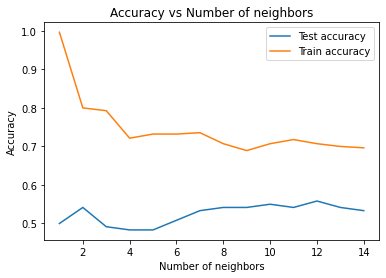

In [13]:
# generating  the plot
plt.plot(neighbors, test_accuracy, label = 'Test accuracy')
plt.plot(neighbors, train_accuracy, label = 'Train accuracy')
plt.title('Accuracy vs Number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The test accuracy is highest when using 12 neighbors. Using 13 neighbors or more result in the simple model that underfits the data.

# Regression

In [14]:
# read and explore dataset
gapminder = pd.read_csv('gm_2008_region.csv')
gapminder.head(2)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa


In [15]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [16]:
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [17]:
# create array for features and target variables
X = gapminder['fertility'].values
y = gapminder['life'].values
print(X.shape)
print(y.shape)

(139,)
(139,)


In [18]:
# reshape X and y
X_reshaped = X.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)
print(X_reshaped.shape)
print(y_reshaped.shape)

(139, 1)
(139, 1)


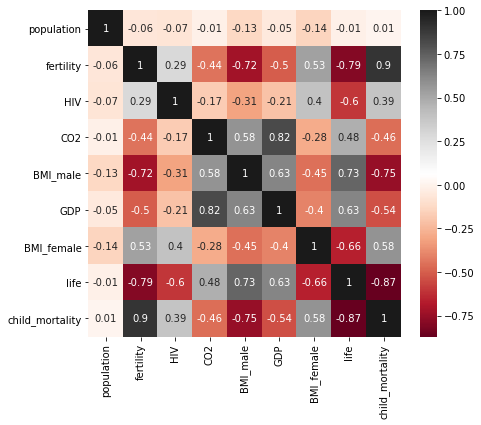

In [19]:
# compute correlations and quantify the strength off linear relationship between variables
plt.figure(figsize = (7, 6))
sns.heatmap(round(gapminder.corr(), 2), annot = True, cmap = 'RdGy')
plt.show()

The heatmap indicates strong negative correlation between life expectancy ('life' column) and average number of kids ('fertility' column).

Fit and predict for regression.

In [20]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

# create Regressor
reg  = LinearRegression()

# setup the regression space to range from the minimum to the maximum of X
prediction_space = np.linspace(min(X_reshaped), max(X_reshaped))
prediction_space.shape

(50, 1)

In [21]:
# fit the model to the data
reg.fit(X_reshaped, y_reshaped)

# compute prediction over the prediction space
y_pred = reg.predict(prediction_space)

# compute R-squared
reg.score(X_reshaped, y_reshaped)

0.6192442167740035

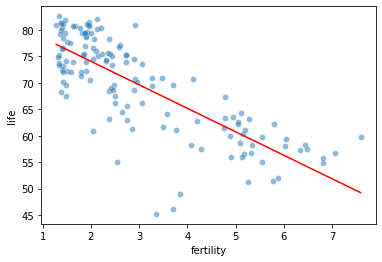

In [22]:
# plot the regression line
fig, ax = plt.subplots()
sns.scatterplot(x = 'fertility', y = 'life', data = gapminder, alpha = .5)
plt.plot(prediction_space, y_pred, color = 'red')
plt.show()

Train_test_split for regression

Train and test split are vital to ensure that our supervised learning model is able to generalize well to new data. This is True for both classification and linear regression models.

Now we split gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the score, we also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models.

In [23]:
# import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
# create features and target variables
X = gapminder.drop(['life', 'Region'], axis = 1)
y = gapminder['life']

# split gapminder dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

# create Regressor: reg_all
reg_all = LinearRegression()

# fit regressor to the training data
reg_all.fit(X_train, y_train)

# predict on the test data
y_pred = reg_all.predict(X_test)

# compute R-squared
print(reg_all.score(X_test, y_test))

# compute RMSE. To do this, first compute the Mean Squared Error using mean_squared_error() function
# then take its square root using np.sqrt()
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(RMSE)

0.838046873143013
3.247601080036951


Using all features has improved the model score. This make sense, as the model has more information to learn from.

Cross-validation

Cross-validation is a vital step in evaluating a  model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In [25]:
gapminder.head(2)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa


In [26]:
X = gapminder.drop(['life', 'Region'], axis = 1).values
y = gapminder['life']

In [27]:
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# create linear regression object: reg
reg = LinearRegression()

# compute 5_fold cross validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# compute average cross-validation score
print(np.mean(cv_scores))
print(cv_scores)

0.8599627722793505
[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


Regularization: Lasso_regression

Lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is known as L1 regularization because the regularization term is the L1 norm of the coefficient.

Regularization penalize lagre coefficients to avoid overfitting. Lasso regression can be used to select important of the dataset.

Fit a lasso regression to gapminder dataset and plot coefficients. Then we find that coefficients of some features are shrunk to 0, with only the most important ones remaiming.

In [28]:
from sklearn.linear_model import Lasso

# instantiate Lasso regressor: lasso
lasso = Lasso(alpha = .4, normalize = True)

# fit regressor to the data
lasso.fit(X, y)

# compute coefficients
lasso_coeff = lasso.fit(X, y).coef_
lasso_coeff

array([-0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.07087587])

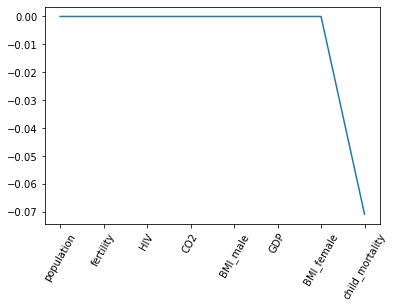

In [29]:
# plot coefficients on y_axis and column names on x_axis
gapminder_columns = gapminder.drop(['life', 'Region'], axis = 1).columns

plt.plot(gapminder_columns, lasso_coeff)
plt.xticks(rotation = 60)
plt.show()

Regularization: Ridge regression

If we took the sum of squared values of coefficients multiplied by some alpha, like Ridge regression, we would be computing L2 norm.

We practice fitting Ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using the function that we have defined, which plots the R2 scores as well as standard error for each alpha.

In [30]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    
    std_error = cv_scores_std / np.sqrt(10)
    
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha = 0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle = '--', color = '.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

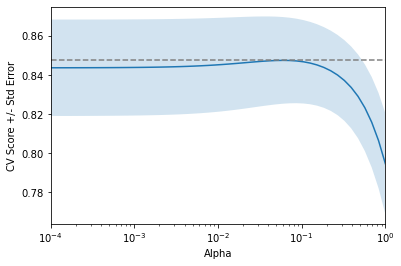

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# setup array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50) 
ridge_scores = []
ridge_scores_std = []

# create Ridge regressor: ridge
ridge = Ridge(normalize = True)

# compute scores over the range of alphas
for alpha in alpha_space:
    
    # specify the alpha value  to use: ridge.alpha
    ridge.alpha = alpha
    
    # perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    
    # append the mean of ridge_cv_scores to ridge_score
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
# display the plot
display_plot(ridge_scores, ridge_scores_std)
plt.show()

The cross-validation scores change with different alphas.

# Fine-tuning the model

Metrics for classification

Accuracy is not always an informative metric for classification models. Now we compute confusion matrix and generate classification report. The classification report consisted of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class. The precision, recall and f1_score columns gave the respective metrics for that particular class.

In [32]:
# import dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


The goal is to predict whether or not a given female patient will contract diabetes based on features such as BIM, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

We train k-NN Classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [33]:
# import modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.graphics.mosaicplot import mosaic

In [34]:
# create features and target variables
X = diabetes.drop('diabetes', axis = 1)
y = diabetes['diabetes']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

# instantiate k-NN Classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

#  fit Classifier  to the training data
knn.fit(X_train, y_train)

# make prediction  on testing set
y_pred = knn.predict(X_test)

# generate aa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[176,  30],
       [ 56,  46]], dtype=int64)

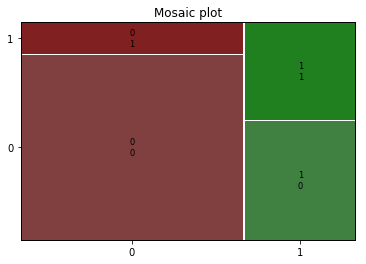

In [35]:
# plot confusion matrix
mosaic(conf_matrix, title = 'Mosaic plot')
plt.show()

In [36]:
# extract TN, TP, FN, FP from confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

In [37]:
# create classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



Logistic regression and ROC curve

Scikit-learn makes it very easy to try different models, since the Train_test_split/Instantiate/Fit/Predict paradigms applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'.  

Check if logistic regression outperforms k-NN.

In [38]:
# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.graphics.mosaicplot import mosaic

In [39]:
# read dataset
diabetes.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [40]:
# create features and target variable
X = diabetes.drop('diabetes', axis = 1)
y = diabetes['diabetes']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

# instanttiate logistic regresion object
logreg = LogisticRegression(max_iter = 1000)

# fit the classifier to the training data
logreg.fit(X_train, y_train)

# predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[168,  38],
       [ 36,  66]], dtype=int64)

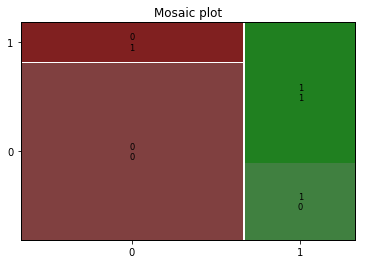

In [41]:
# create mosaic plot
mosaic(conf_matrix, title = 'Mosaic plot')
plt.show()

In [42]:
# compute classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



Plotting ROC curve 

Classification report and confusion matrix are great methods to quantitatively evaluate model performance, while ROC curve provides a way to visually evaluate models. Most classifiers in scikit-learn have a .predict_proba() method which returnes the probability of a given sample being in particular class.

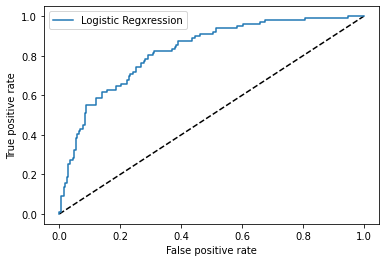

In [43]:
# import module
from sklearn.metrics import roc_curve

# using logreg Classifier compute predicted probabilities of the labels of X_test
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# create ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot ROC curve with fpr on x-axis  and tpr on y-axis
fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regxression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

Presision-Recall curve

Precision-Recall curve is another way to visually evaluate a model performance. Precision-Recall curve generated by plotting the precision and recall for different thresholds. This implementation is restricted to the binary classification task.

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

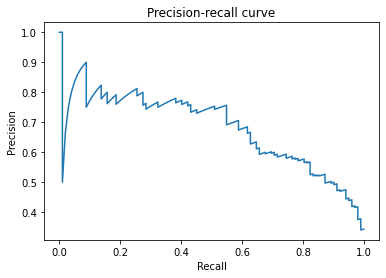

In [44]:
# import module
from sklearn.metrics import precision_recall_curve

# generate precision-recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# plot precision-recall curve with recall on x-axis and precision on y-axis
fig = plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

The precision-recall curve shows the tradeoff between precision and  recall for different thresholds. The high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier returns accurate results (high precision), as well as returns a majority of all positive results (high recall).
An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Area under the ROC curve

Large area under the ROC curve = better model. '1' is maximum

Compute area under the ROC curve AUC using roc_auc)score() function

In [45]:
# import modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# compute predicred probabilities of the labels of the test set X_test
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# compute AUC score
roc_auc_score(y_test, y_pred_prob)

0.8242908814011042

Compute AUC scores by performing 5-fold cross-validation

In [46]:
cv_scores = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')
cv_scores

array([0.81240741, 0.80777778, 0.82555556, 0.87283019, 0.84471698])

In [47]:
np.mean(cv_scores)

0.8326575821104122

Compute average precision AP using average_precision_score() function

AP is an alternative to AUC to evaluate the model performance.

In [48]:
# import module
from sklearn.metrics import average_precision_score

# compute AP
average_precision_score(y_test, y_pred_prob)

0.6833228613458534

In [49]:
# compute AP scores by performing 5-fold cross-validation
cv_scores_1 = cross_val_score(logreg, X, y, cv = 5, scoring = 'average_precision')
cv_scores_1

array([0.73274528, 0.70235979, 0.74564386, 0.78030386, 0.68637596])

In [50]:
# compute average of AP
np.mean(cv_scores_1)

0.7294857502390247

Hyperparameter tuning with GridSearchCV

Like the alpha parameter of Lasso and Ridge regularization, logistic regression also has a regularization parameter: C. C controls the inverse of regularization strength, and this is what we tune now. A large C can lead to an overfit model, while a small C can lead to an underfit model. 

Now we use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space.

In [51]:
diabetes.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [52]:
# create features and a target variable
X = diabetes.drop('diabetes', axis = 1)
y = diabetes['diabetes']

# import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# instantiate LogisticRegression classifier
logreg = LogisticRegression(max_iter = 1000)

# setup the hyperparameter grid using c_space as a grid of values to tune C over
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space}

#  instantiate the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# fit it to the data
logreg_cv.fit(X, y)

# print best parameters and best scores
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.006105402296585327}
0.7734742381801205


Typical values for c and gamma are as follows:

0.0001 < gamma < 10

0.1 < c < 100

Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distribution. 

Our goal now is to use RanddomizedSearchCV to find the optimal hyperparameters.

In [53]:
# import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# setup parameters and distributions to sample from
param_dist = {'max_depth':[3, None],
             'max_features':randint(1, 9),
             'min_samples_leaf':randint(1, 9),
             'criterion':['gini', 'entropy']}
# instantiate DecisionTreeClassifier
tree = DecisionTreeClassifier()

# instantiate RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

# fit it to the data
tree_cv.fit(X, y)

# print tuned parameters and scores
print(tree_cv.best_params_)
print(tree_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 3}
0.7396316102198455


RandomizedSearchCV will never outperform GridSearchCV. Insted, it is valuable because it saves on ccomputation time.

Hold_out set for final evaluation: Classification

In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Now we create a hold-out set, tune C and 'penalty' hyperparameters of LogisticRegression Classifier using GridSearchCV on the training set.

In [54]:
diabetes.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [55]:
# create features and a target variable
X = diabetes.drop('diabetes', axis = 1)
y = diabetes['diabetes']

# import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# instantiate LogisticRegression Classifier
logreg = LogisticRegression(max_iter = 1000)

# check out parameters
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [56]:
# create hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space, 'penalty':['l1', 'l2']}

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state = 42)

# instantiate GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# fit it to the training data
logreg_cv.fit(X_train, y_train)

# print best parameters and best scores
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

{'C': 0.0007196856730011522, 'penalty': 'l2'}
0.7630434782608695


Hold-out set for final evaluation: Regression

Lasso used L1 penalty to regularize, while Ridge used L2 penalty. There is another type of regularized regression - ElasticNet. In ElasticNet regularization, penalty term is a linear ccombination of L1 and L2 penalties: aL1 + bL2.

In scikit-learn this term is represented by the 'l1_ratio' parameter. 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

In [57]:
# import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# read dataset
gapminder.head(2)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa


In [58]:
# transform categorical feature 'Region'
gapminder_trans = pd.get_dummies(gapminder, drop_first = True)

# create features and a target variable
X = gapminder_trans.drop('life', axis = 1)
y = gapminder_trans['life']

# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

# instantiate ElasticNet regressor
elastic_net = ElasticNet()

# get parameters
elastic_net.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [59]:
# create hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio':l1_space}

# setup GridSearchCV object
elastic_net_cv = GridSearchCV(elastic_net, param_grid, cv = 5)

# fit it to the data
elastic_net_cv.fit(X_train, y_train)

# predict on the test set
y_pred = elastic_net_cv.predict(X_test)

# compute R2 and mean_squared_error
r2 = elastic_net_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(elastic_net_cv.best_params_)
print(r2)
print(mse)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279.90845397297187, tolerance: 0.558941590909091
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305.63658533083424, tolerance: 0.5893071666666667
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253.16202651967424, tolerance: 0.5890250303030303
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

{'l1_ratio': 0.0}
0.8697529413665848
9.837193188072188


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363.42673491182916, tolerance: 0.7252346987951809
  model = cd_fast.enet_coordinate_descent(


# Preprocessing data

In [60]:
import pandas as pd
df = pd.read_csv('gm_2008_region.csv')
df.head(2)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa


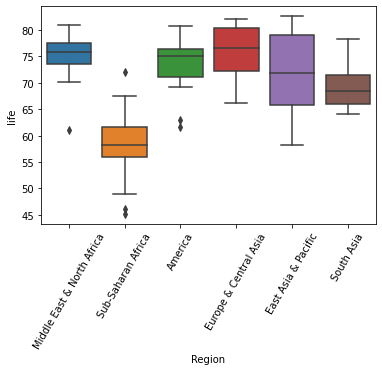

In [61]:
# visualize of 'life' vs 'Region'
sns.boxplot(x = 'Region', y = 'life', data = df)
plt.xticks(rotation = 60)
plt.show()

"Region" feature contains very useful infirmation that can predict life expectancy. For example, Sub-Sahara Africa has a lower life expectancy compared to Europe and Central Asia. Therefore. if we are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, we need to binarize it by creating dummy variables.

In [62]:
# create dummy variables
df_region = pd.get_dummies(df)

# print columns of df_region
df_region.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')

In [63]:
# create dymmy variables with drop_first=True  attribute of get_dummies
df_region = pd.get_dummies(df, drop_first=True)
df_region.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')

Specifying drop_first=True we drop unneeded dummy variable (in this case 'Region_America').

Now, that we have created dummy variables, we can use the 'Region' feature to predict life expectancy!

Regression with categorical features

In [64]:
# import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# create features and a target variable
X = df_region.drop('life', axis = 1)
y = df_region['life']

# instantiate a Ridge regressor
ridge = Ridge(alpha = .5, normalize = True)

# performe 5-fold  cross-validation
ridge_cv = cross_val_score(ridge, X, y, cv = 5)

# print cross-validated scores
ridge_cv

array([0.86808336, 0.80623545, 0.84004203, 0.7754344 , 0.87503712])

Dropping missing data

In [65]:
votes = pd.read_csv('house-votes-84.csv')
votes.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


We see that there are certain data points labeled with '?'. These denote missing values. Different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real- world data can be very messy! If you are lucky, the missing values will already be encoded as NaN. We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn`s imputation transformer.

We have to convert '?' to NaNs, and then drop rows that contain them from from DataFrame.

In [66]:
# convert '?' to NaN
votes[votes == '?'] = np.nan

# count the total number of NaNs
votes.isnull().sum()

republican      0
n              12
y              48
n.1            11
y.1            11
y.2            15
y.3            11
n.2            14
n.3            15
n.4            22
y.4             7
?              20
y.5            31
y.6            25
y.7            17
n.5            28
y.8           104
dtype: int64

In [67]:
votes.isna().sum()

republican      0
n              12
y              48
n.1            11
y.1            11
y.2            15
y.3            11
n.2            14
n.3            15
n.4            22
y.4             7
?              20
y.5            31
y.6            25
y.7            17
n.5            28
y.8           104
dtype: int64

In [68]:
# drop NaNs
votes_droped = votes.dropna()
votes_droped.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
18,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
22,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
24,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [69]:
print(votes.shape)
print(votes_droped.shape)

(434, 17)
(232, 17)


If we drop missing data, we may end up throwing away valuable information along with missing data. It is better instead to develop an imputation strategy. We can impute missing values with the mean or median of the row or column that the missing data is in.

In [70]:
# check dataset and prepare it for modelling
votes.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
1,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [71]:
# replace 'n' with 0 and 'y' with 1
votes[votes == 'n'] = 0
votes[votes == 'y'] = 1
votes.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
1,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


Imputing missing data in ML pipeline

Having setup the pipeline steps, we can use it for classification.

Now we use it on the voting dataset to classify a Congressman`s party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. We can use the .fit() and .predict() methods on pipelines just as we did with classifiers and regressions!

SVC stands for Support Vector Classification, which is type of SVM (Support Vector Machine).

In [72]:
# import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.graphics.mosaicplot import mosaic

# create features and a target variable
X = votes.drop('republican', axis = 1)
y = votes['republican']

# setup the imputation transformer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# instantiate SVC
clf = SVC()

# create steps of pipeline with a list of tuples
# first tuple should consist of the imputation step
# second tuple should consist of classifier
steps = [('imputation', imp), ('SVC', clf)]

# create the pipeline
pipeline = Pipeline(steps)

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

# fit the pipeline to the training set
pipeline.fit(X_train, y_train)

# predict the labels on the test set
y_pred = pipeline.predict(X_test)

# print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.99      0.94      0.96        83
  republican       0.90      0.98      0.94        48

    accuracy                           0.95       131
   macro avg       0.95      0.96      0.95       131
weighted avg       0.96      0.95      0.95       131

[[78  5]
 [ 1 47]]


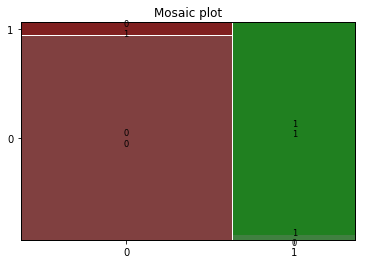

In [73]:
# plot confusion matrix
mosaic(confusion_matrix(y_test, y_pred), title = 'Mosaic plot')
plt.show()

Imputing missing data separately

In [74]:
# import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# create features and a target variable
X = votes.drop('republican', axis = 1)
y = votes['republican']

# instantiate the imputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# fit the imputer to the data and then transform it
X = imp.fit_transform(X)
X

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0]], dtype=object)

In [75]:
# instantiate the model
clf = SVC()

# create training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

# fit our model to the training set
clf.fit(X_train, y_train)

# predict the labels on the test set
y_pred = clf.predict(X_test)

# create classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.99      0.93      0.96        83
  republican       0.89      0.98      0.93        48

    accuracy                           0.95       131
   macro avg       0.94      0.95      0.94       131
weighted avg       0.95      0.95      0.95       131

[[77  6]
 [ 1 47]]


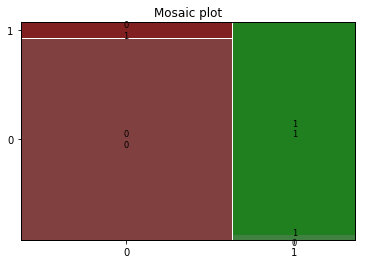

In [76]:
# plot confusion matrix
mosaic(confusion_matrix(y_test, y_pred), title = 'Mosaic plot')
plt.show()

Centering and scaling

In [77]:
wine = pd.read_csv('white-wine.csv')
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [78]:
wine.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

We use 'quality' feature of the wine dataset to create a binary target variable. If 'quality' is less than 5, the target variable is 1, otherwise it is 0.

In [80]:
# add column 'target'
range = [0, 4, np.inf]
group_names = [1, 0]
wine['target'] = pd.cut(wine['quality'], bins = range, labels = group_names)
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,0


Scaling the features

In [81]:
# import modules
from sklearn.preprocessing import scale

# create features and a target variable
X = wine.drop(['quality', 'target'], axis = 1).values
y = wine.target.values

# scale the features
X_scaled = scale(X)

# check scaled data vs unscaled data
print('Mean scaled: ', np.mean(X_scaled))
print('STD scaled: ', np.std(X_scaled))
print('Mean unscaled: ', np.mean(X))
print('Std unscaled: ', np.std(X))

Mean scaled:  2.7314972981668206e-15
STD scaled:  0.9999999999999999
Mean unscaled:  18.432687072460002
Std unscaled:  41.54494764094571


Centering and scaling pipeline

In [82]:
# import modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# create features and a target variable
X = wine.drop(['quality', 'target'], axis = 1).values
y = wine.target.values

# setup pipeline steps
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

# instantiate pipeline
pipeline = Pipeline(steps)

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

# fit pipeline to the training set
knn_scaled = pipeline.fit(X_train, y_train)

# instantiate and fit k-NN Classifier to unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

#  compute accuracy scores for scaled and unscaled data
print('Accuracy of scaled data: ', knn_scaled.score(X_test, y_test))
print('Accuracy of unscaled data: ', knn_unscaled.score(X_test, y_test))

Accuracy of scaled data:  0.964625850340136
Accuracy of unscaled data:  0.9666666666666667


Scaling has not improved model performance.

Pipeline for Classification: now we build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

In [83]:
# import modules
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# create features and a target variable
X = wine.drop(['target', 'quality'], axis = 1).values
y = wine.target.values


# setup pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)

# specify the hyperparameter space using following notation:
# 'step_name__parameter_name'
#  here, step name is SVM, parameter names are C and gamma
parameters = {'SVM__C':np.linspace(0.1, 100, 20), 'SVM__gamma':np.linspace(1e-4, 10, 20)}

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 21)

# instantiate the GridSearchCV object
cv = GridSearchCV(pipeline, parameters)

# Fit it to the training set
cv.fit(X_train, y_train)

# predict labels on the test set
y_pred = cv.predict(X_test)

# compute and print metrics
print('Accuracy: ', cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print('Tuned model parameters: ', cv.best_params_ )

Accuracy:  0.9775510204081632
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       951
           1       1.00      0.24      0.39        29

    accuracy                           0.98       980
   macro avg       0.99      0.62      0.69       980
weighted avg       0.98      0.98      0.97       980

Tuned model parameters:  {'SVM__C': 5.3578947368421055, 'SVM__gamma': 3.684273684210526}


In [84]:
# checking available parameters
cv.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__scaler', 'estimator__SVM', 'estimator__scaler__copy', 'estimator__scaler__with_mean', 'estimator__scaler__with_std', 'estimator__SVM__C', 'estimator__SVM__break_ties', 'estimator__SVM__cache_size', 'estimator__SVM__class_weight', 'estimator__SVM__coef0', 'estimator__SVM__decision_function_shape', 'estimator__SVM__degree', 'estimator__SVM__gamma', 'estimator__SVM__kernel', 'estimator__SVM__max_iter', 'estimator__SVM__probability', 'estimator__SVM__random_state', 'estimator__SVM__shrinking', 'estimator__SVM__tol', 'estimator__SVM__verbose', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

Pipeline for regression

Now we build a pipeline that imputes the missing data, scaler the features, and fits an ElasticNet to the Gapminder data. We then tune l1_ratio of ElasticNet using GridSearchCV.

In [85]:
gapminder.head(2)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa


In [88]:
# transform 'Region' column to binary values
gapminder_transformed = pd.get_dummies(gapminder, drop_first = True)
gapminder_transformed.head(2)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1


In [90]:
# check for missing data
gapminder_transformed.isna().sum()

population                           0
fertility                            0
HIV                                  0
CO2                                  0
BMI_male                             0
GDP                                  0
BMI_female                           0
life                                 0
child_mortality                      0
Region_East Asia & Pacific           0
Region_Europe & Central Asia         0
Region_Middle East & North Africa    0
Region_South Asia                    0
Region_Sub-Saharan Africa            0
dtype: int64

In [94]:
# import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# create features and a target variable
X = gapminder_transformed.drop('life', axis = 1).values
y = gapminder_transformed['life'].values

# setup the pipeline steps
steps = [('imputation', SimpleImputer(missing_values = np.nan, strategy = 'mean')), 
         ('scaler', StandardScaler()), ('elastic_net', ElasticNet())]
# create the pipeline
pipeline = Pipeline(steps)

# specify hyperparameter space
parameters = {'elastic_net__l1_ratio':np.linspace(0, 1, 30)}

# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

# instantiate GridSearchCV object
cv = GridSearchCV(pipeline, parameters)

# fit GridSearchCV to the training set
cv.fit(X_train, y_train)

# compute R2 and best parameters
print('Rsquared: ', cv.score(X_test, y_test))
print('Best arameters: ', cv.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 812.6287878846165, tolerance: 0.558941590909091
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 841.0241084297651, tolerance: 0.5893071666666667
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798.3369400898791, tolerance: 0.5890250303030303
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

Rsquared:  0.8862016549771036
Best arameters:  {'elastic_net__l1_ratio': 1.0}
